In [29]:
# Load in libraries

import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pathlib import Path

from experiment_code.constants import Defaults

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Load in Participant Info

In [30]:
file_name = "Participant Info.csv"

df_info = pd.read_csv(os.path.join(Defaults.RAW_DIR, file_name))

## Load in subject dataframes and concatenate

In [31]:
# navigate to raw data folder
os.chdir(Defaults.RAW_DIR)

file_list = glob.glob("*cort_scaling*")

# make empty dataframe
df_all = pd.DataFrame()
# loop over each subject file
for file in file_list:
    # reading csv for subj
    df = pd.read_csv(file)
    cols = df.columns
    col_to_rename = cols[df.columns.str.find("CoRT")==0][0]
    df = df.rename(columns={col_to_rename: 'CoRT'})
    df['subj_id'] = re.findall(r'(s\w.)_', file)[0]
    # concats each subj together
    df_all = pd.concat([df_all, df], sort=True)
    
# merge df info dataframe and subj data dataframes
df_merged = df_all.merge(df_info, on='subj_id')
df_merged

,CoRT,Response,Sentence Stem,subj_id,naming_convention,task,group,DOB,gender,XLab or RPP?,date_collected,versions,notes_SB
0,1,Voice,She could tell he was mad by the tone of his,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
1,4,Bread,She went to the bakery for a loaf of,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
2,3,Ring,Bob proposed and gave her a diamond,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
3,2,Day,The dentist recommends brushing your teeth twi...,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
4,5,Neck,He loosened the tie around his,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
5,1,Team,Dan was asked to be the new coach of the,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
6,4,Tip,They paid for their meals but forgot to leave a,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
7,1,Loans,To pay for tuition she took out two student,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
8,3,Time,She didn’t have her watch so she asked for the,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
9,2,Deaf,Sherry had to read lips because she was,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...


In [32]:
def extract_string(x):
    if type(x)==str:
#         value = x.str.extract('(\d+)')
        value = re.findall(r'\d+', x) 
        value = float(value[0])
    elif type(x)==float:
        value = x
    elif type(x)==int:
        value = float(x)
        
    return value

In [33]:
# clean up

df_merged['CoRT'] = df_merged['CoRT'].apply(lambda x: extract_string(x))

# drop nan values
# df_merged = df_merged.dropna()

## Visualization 

## Distribution of CoRT scores broken down by group (expert versus novice)

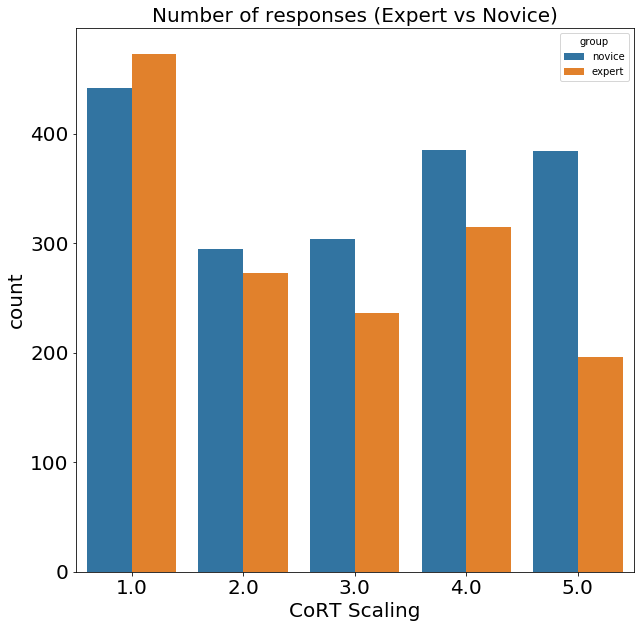

In [34]:
plt.figure(figsize=(10,10))

sns.countplot(x='CoRT', hue='group', data=df_merged)
plt.xlabel('CoRT Scaling', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of responses (Expert vs Novice)', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [35]:
df_merged

,CoRT,Response,Sentence Stem,subj_id,naming_convention,task,group,DOB,gender,XLab or RPP?,date_collected,versions,notes_SB
0,1.0,Voice,She could tell he was mad by the tone of his,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
1,4.0,Bread,She went to the bakery for a loaf of,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
2,3.0,Ring,Bob proposed and gave her a diamond,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
3,2.0,Day,The dentist recommends brushing your teeth twi...,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
4,5.0,Neck,He loosened the tie around his,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
5,1.0,Team,Dan was asked to be the new coach of the,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
6,4.0,Tip,They paid for their meals but forgot to leave a,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
7,1.0,Loans,To pay for tuition she took out two student,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
8,3.0,Time,She didn’t have her watch so she asked for the,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...
9,2.0,Deaf,Sherry had to read lips because she was,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...


<Figure size 720x720 with 0 Axes>

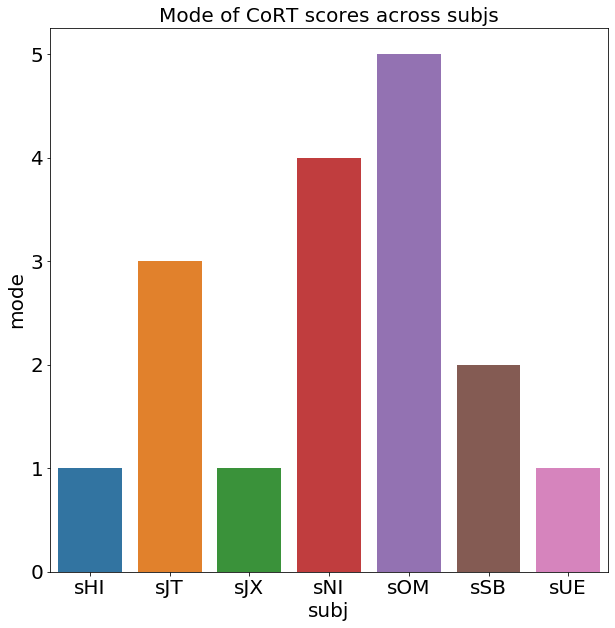

In [36]:
# plot mode and std of versions
plt.figure(figsize=(10,10))

# x = df_merged.groupby('group').apply(lambda x: x[['CoRT']].std()).reset_index()
# sns.barplot(x=x['group'], y=x['CoRT']);
# plt.xlabel('version', fontsize=20)
# plt.ylabel('std of CoRT scores', fontsize=20)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.title('Std of CoRT scores across versions', fontsize=20);


plt.figure(figsize=(10,10))

x = df_merged.groupby('subj_id').apply(lambda x: x[['CoRT']].mode()).reset_index()
sns.barplot(x=x['subj_id'], y=x['CoRT']);
plt.xlabel('subj', fontsize=20)
plt.ylabel('mode', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Mode of CoRT scores across subjs', fontsize=20);

## Distribution of cloze probabilities

In [37]:
df_cloze = pd.read_csv(os.path.join(Defaults.STIM_DIR, "Block_Baldwin_2010.csv"))

# clean up - rename and drop cols
df_cloze = df_cloze.rename({'Present (2010)':'cloze', 'Sentence Stem': 'sentence', 'Response':'response'}, axis=1).drop({'Response.1', 'B&F (1980)'}, axis=1)

# add cloze prob to cort scores
df_cloze_cort = df_merged.merge(df_cloze, left_on="Sentence Stem", right_on="sentence")

df_cloze_cort = df_cloze_cort.dropna()

df_cloze_cort

,CoRT,Response,Sentence Stem,subj_id,naming_convention,task,group,DOB,gender,XLab or RPP?,date_collected,versions,notes_SB,sentence,response,cloze
0,1.0,Voice,She could tell he was mad by the tone of his,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...,She could tell he was mad by the tone of his,Voice,0.99
1,2.0,Voice,She could tell he was mad by the tone of his,sNI,2nd letter (first & last),cort_scaling,novice,1/14/1998,Female,XLab,2/13/20,1,Found difficult to choose the in-between ratin...,She could tell he was mad by the tone of his,Voice,0.99
3,1.0,Voice,She could tell he was mad by the tone of his,sHI,2nd letter (first & last),cort_scaling,novice,1/5/2000,Male,XLab,2/12/20,1,Found east to assess whether visualizable or not,She could tell he was mad by the tone of his,Voice,0.99
6,3.0,Voice,She could tell he was mad by the tone of his,sUE,2nd letter (first & last),cort_scaling,novice,6/4/1996,Female,XLab,2/13/20,1,Had a background in linguistic and psychology ...,She could tell he was mad by the tone of his,Voice,0.99
7,4.0,Bread,She went to the bakery for a loaf of,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...,She went to the bakery for a loaf of,Bread,0.98
8,4.0,Bread,She went to the bakery for a loaf of,sNI,2nd letter (first & last),cort_scaling,novice,1/14/1998,Female,XLab,2/13/20,1,Found difficult to choose the in-between ratin...,She went to the bakery for a loaf of,Bread,0.98
10,3.0,Bread,She went to the bakery for a loaf of,sHI,2nd letter (first & last),cort_scaling,novice,1/5/2000,Male,XLab,2/12/20,1,Found east to assess whether visualizable or not,She went to the bakery for a loaf of,Bread,0.98
13,4.0,Bread,She went to the bakery for a loaf of,sUE,2nd letter (first & last),cort_scaling,novice,6/4/1996,Female,XLab,2/13/20,1,Had a background in linguistic and psychology ...,She went to the bakery for a loaf of,Bread,0.98
14,3.0,Ring,Bob proposed and gave her a diamond,sOM,2nd letter (first & last),cort_scaling,novice,1/21/1999,Male,XLab,2/12/20,1,Last-minute friend recruit due to dropout. Was...,Bob proposed and gave her a diamond,Ring,0.98
15,4.0,Ring,Bob proposed and gave her a diamond,sNI,2nd letter (first & last),cort_scaling,novice,1/14/1998,Female,XLab,2/13/20,1,Found difficult to choose the in-between ratin...,Bob proposed and gave her a diamond,Ring,0.98


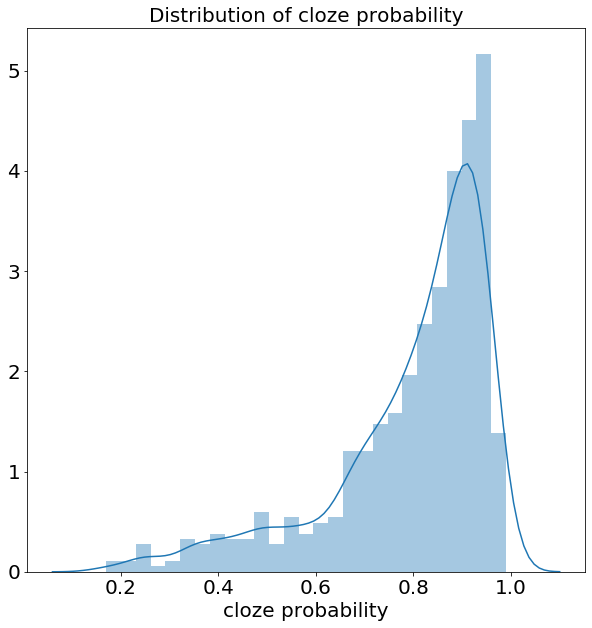

In [26]:
# Visualize distribution of cloze probability

plt.figure(figsize=(10,10))

sns.distplot(df_cloze_cort['cloze'])
plt.xlabel('cloze probability', fontsize=20)
plt.title('Distribution of cloze probability', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

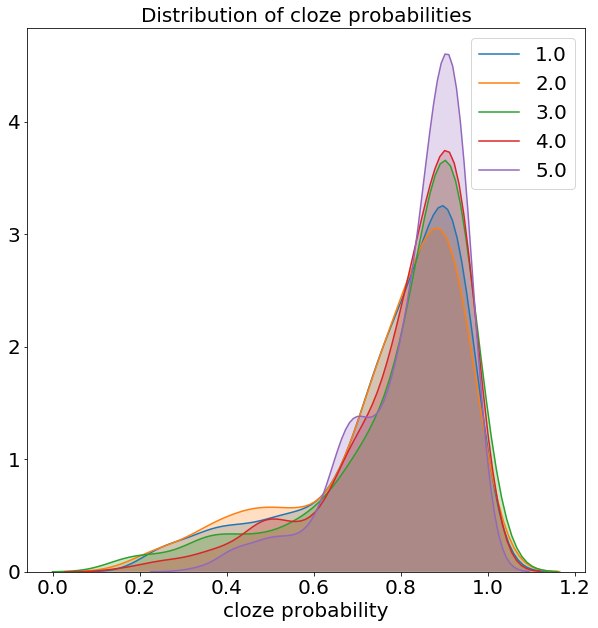

In [27]:
cort_scores = df_cloze_cort['CoRT'].unique()

plt.figure(figsize=(10,10))

# plot histogram of cloze probabilities for each cort scale
for cort in cort_scores:
#     plt.figure()
    sns.kdeplot(df_cloze_cort.loc[df_cloze_cort['CoRT']==cort]['cloze'], shade=True)
    plt.title(f'Distribution of cloze probabilities', fontsize=20)
    plt.xlabel('cloze probability', fontsize=20)
    plt.legend(cort_scores, fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)